# **Clustering with K-Means**

## **Objective**
- To segment customers based on their spending habits and demographic information using K-Means clustering.
- To gain actionable insights into customer behavior for targeted marketing strategies.

## **Metadata**
- **Dataset Name**: Mall Customers Dataset
- **Source**: Kaggle
- **Features**:
  - `CustomerID`: Unique identifier for each customer.
  - `Gender`: Gender of the customer (Male/Female).
  - `Age`: Age of the customer.
  - `Annual Income (k$)`: Annual income of the customer in thousands of dollars.
  - `Spending Score (1-100)`: A score assigned based on customer spending habits and behavior.


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# Load the dataset
path = "/content/Mall_Customers.csv"
data = pd.read_csv(path)

# Display the first few rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

## **Data Overview**
The dataset contains 5 columns:
- `CustomerID`: A unique ID for each customer.
- `Gender`: The gender of the customer.
- `Age`: The age of the customer.
- `Annual Income (k$)`: The annual income of the customer in thousands of dollars.
- `Spending Score (1-100)`: A score assigned to the customer based on spending patterns.

### **Summary Statistics**
- Rows: 200
- Columns: 5


# **Step 2: Exploratory Data Analysis (EDA)**

Checking for Missing Values

In [5]:
# Check for missing values
data.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Interpretation: The dataset does not contain any missing values, ensuring the completeness of our data.

**Statistical Summary**

In [6]:
# Statistical summary of the dataset
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Distribution of Features**

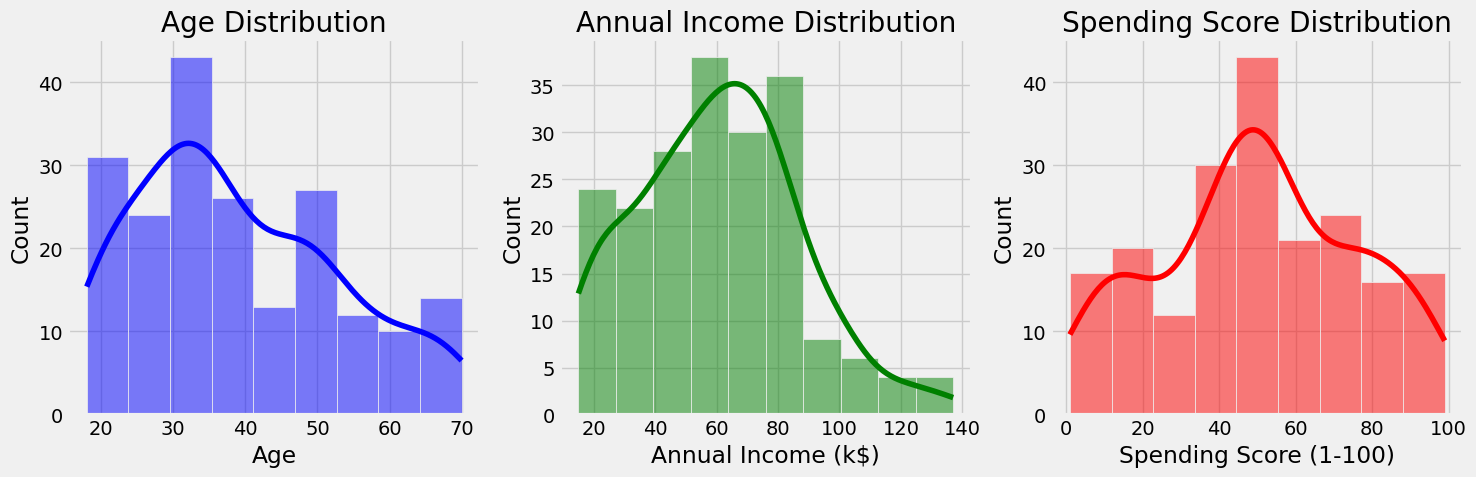

In [10]:
# Distribution plots for numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


**Interpretation:**

 The distribution plots reveal the following:

- Age: The age distribution is slightly right skewed, with a concentration around 30 years.
- Annual Income: The income distribution is uniform, indicating equal representation across different income levels.
- Spending Score: The spending score is uniformly distributed, suggesting a diverse range of customer spending behaviors.

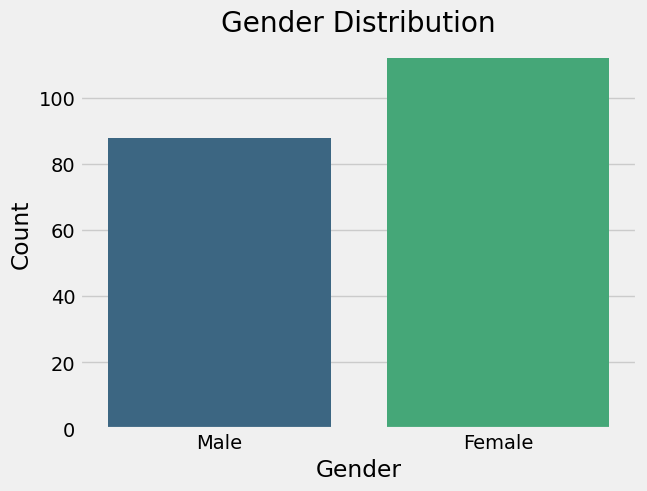

In [11]:
  # Gender distribution
sns.countplot(x='Gender', data=data, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Interpretation**:
The dataset contains more female customers than male customers. This might impact the clustering results based on demographics.


**Annual Income vs. Spending Score**

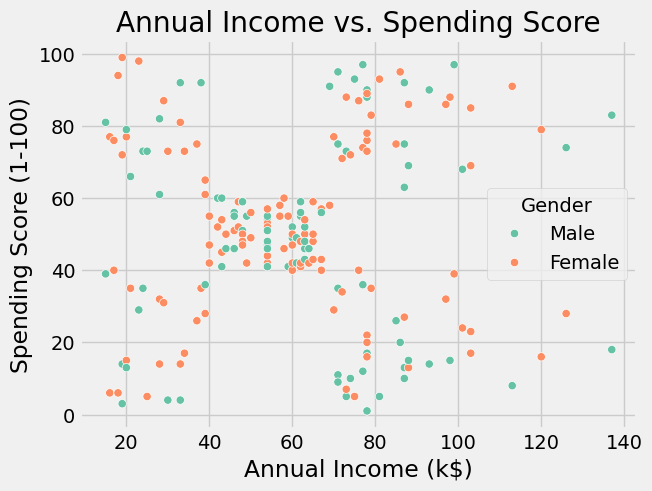

In [12]:
# Scatterplot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data, palette='Set2')
plt.title("Annual Income vs. Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


**Interpretation**:
- Customers with higher spending scores are spread across a wide range of income levels.
- No obvious linear relationship between income and spending score.

**Correlation Heatmap**

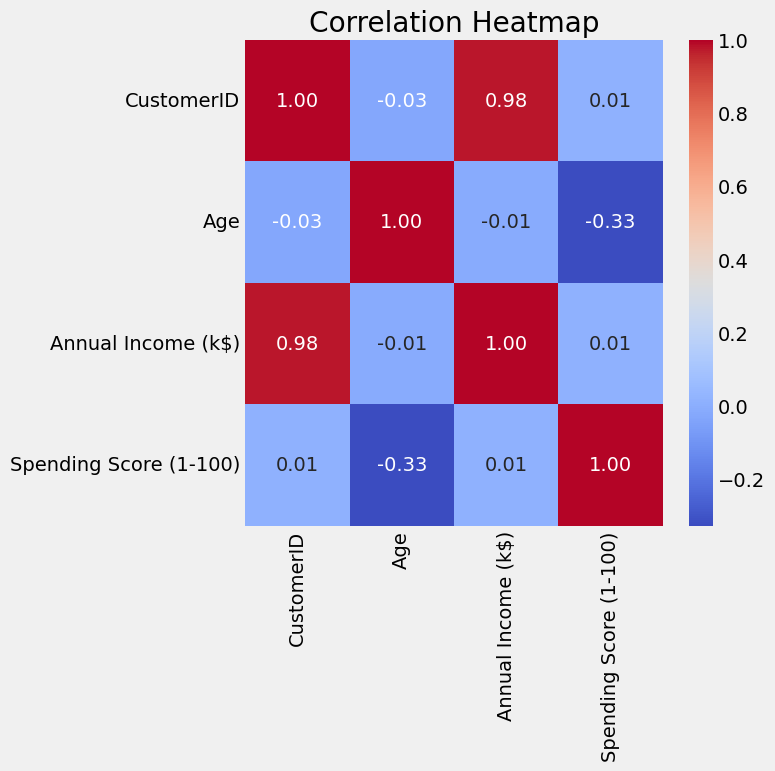

In [15]:
# Correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


**Interpretation**:
There is minimal correlation between age, income, and spending score, indicating that these variables contribute independently to customer segmentation.


# **Step 3: Data Preprocessing**
Encoding Categorical Variables

In [16]:
  # Encode 'Gender' column: Male as 1, Female as 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})



The 'Gender' feature is encoded numerically to facilitate mathematical computations during clustering.

**Feature Selection**

In [17]:
# Select features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


We select 'Age', 'Annual Income', and 'Spending Score' as the features for clustering, as they are relevant for customer segmentation.

**Feature Scaling**

In [18]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Standardizing the features ensures that each feature contributes equally to the distance calculations in clustering algorithms.

# **Principal Component Analysis (PCA)**

Applying PCA

In [19]:
  # Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])


PCA reduces the dimensionality of the dataset to two principal components, capturing the majority of the variance, which aids in visualizing the data.

# **Determining the Optimal Number of Clusters**

**Elbow Method**

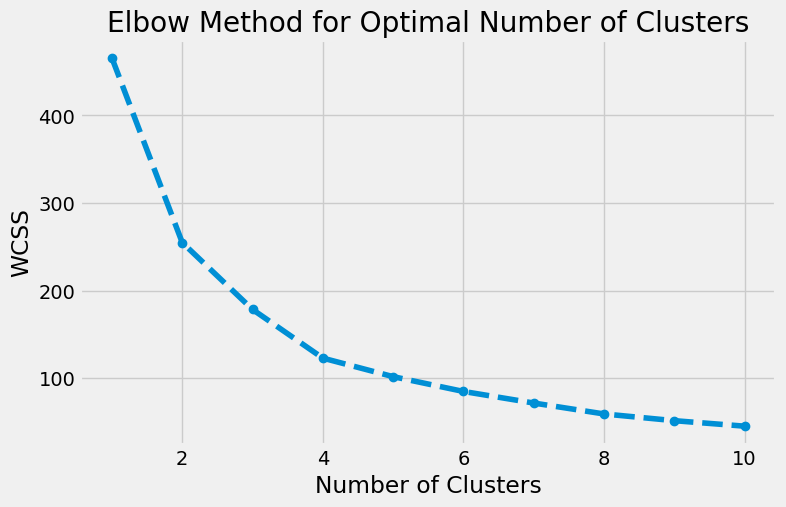

In [20]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


The Elbow Method helps identify the optimal number of clusters by locating the 'elbow point' where the within-cluster sum of squares (WCSS) starts to diminish significantly.

**Silhouette Score Analysis**

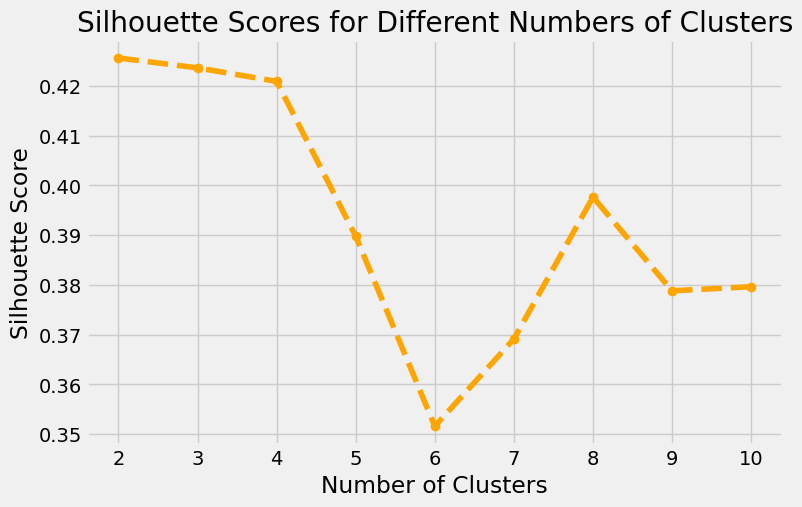

In [21]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []

for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


The Silhouette Score measures how well each point fits within its cluster. Higher scores indicate better-defined clusters. The optimal number of clusters can be determined by the highest silhouette score.

# **Clustering with K-Means**

**Applying K-Means**

In [22]:
# Apply K-Means with the optimal number of clusters (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels


K-Means clustering is applied to the dataset, dividing customers into four distinct groups based on their similarities in the selected features.

**Visualizing Clusters**

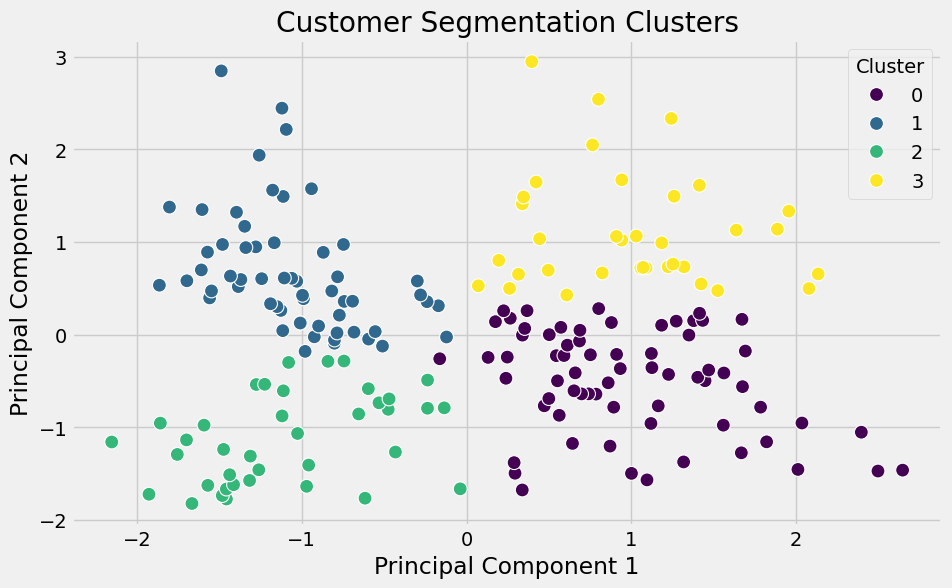

In [26]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


The scatter plot of the principal components highlights the distinct customer segments identified by K-Means clustering. Each color represents a unique cluster.

# **Cluster Profiling**

**Profiling Based on Original Features**

In [24]:
# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Calculate cluster-wise mean for profiling
cluster_profiles = data.groupby('Cluster').mean()

# Display cluster profiles
cluster_profiles


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,66.376812,0.420290,52.144928,46.333333,40.072464
1,144.637931,0.413793,30.000000,79.086207,70.775862
2,36.210526,0.394737,25.605263,32.631579,67.500000
3,164.428571,0.571429,41.685714,88.228571,17.285714


**Interpretation of the cluster profile**

1. **Cluster 0**:  
   - Customers in this cluster have an **average age of 52 years**, the oldest among all clusters.  
   - They exhibit **moderate annual income (46k)** but relatively **low spending scores (40)**.  
   - This group likely includes **conservative spenders**, possibly due to being in later stages of their life.  

2. **Cluster 1**:  
   - This cluster comprises customers with an **average age of 30 years** and the **highest annual income (79k)**.  
   - Their **spending scores are also the highest (71)**, indicating they are **affluent and frequent spenders**.  
   - These are likely the **premium customers** who contribute significantly to revenue.  

3. **Cluster 2**:  
   - The youngest group, with an **average age of 25 years**, represents **new or young customers**.  
   - They have **low annual income (33k)** but **high spending scores (68)**, suggesting they prioritize spending despite limited income.  
   - This cluster could be targeted for **youth-focused products or promotions**.  

4. **Cluster 3**:  
   - Customers in this cluster have an **average age of 41 years** and the **highest annual income (88k)**.  
   - Despite their high income, they have **extremely low spending scores (17)**, indicating **frugal behavior**.  
   - These are **high-income but low-engagement customers**, and strategies to increase their spending might be valuable.  

5. **Gender Distribution**:  
   - Across clusters, the **gender ratio is relatively balanced** but slightly skewed toward females in Cluster 3.  
   - Tailored marketing strategies for gender-based preferences might yield better results.  

6. **Actionable Insights**:  
   - **Cluster 1** should be prioritized for premium products or loyalty programs.  
   - **Cluster 2** could be engaged through discounts or offers to cultivate long-term loyalty.  
   - **Cluster 3** represents untapped potential; targeted campaigns could encourage spending.  
   - **Cluster 0** may not be a high-priority group due to their conservative spending habits.